<a href="https://colab.research.google.com/github/joelbolt35/Machine_Learning/blob/master/HW_3/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1

## Imports


In [0]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import random

## Get Random Data Function

Feature 1:
\begin{equation*}
\:x_1=[0,1)
\end{equation*}

Feature 2:
\begin{equation*}
x_2=w\cdot x_1+b+-1^c\cdot n
\end{equation*}

Seperating line:
\begin{equation*}
y=m\cdot x+b
\end{equation*}

In [0]:
def get_random_data(w, b, mu, sigma, m):
  """Generates a random dataset for logistic regression.

    # Arguments
        w: paramater used to generate data
        b: paramater used to generate data
        mu: The Mean
        sigma: The Standard Deviation
        m: The amount of data entries generated

    # Returns
        Numpy arrays: `(X_train, y_train).
        X_train: Numpy Array of shape (m, 2) => (Two Features)
        y_train: Numpy Array of shape (m, 1) => (Labels)
  """
  # n: The noise
  n = np.random.default_rng().normal(mu, sigma, (m,1))
  # c: Class label (c=0 or c=1)
  y = np.random.randint(2, size=(m,))
  # First Feature: Filled with random values on the interval [0, 1)
  X_1 = np.random.rand(m,)
  # Second Feature: Determined with the equation w * x_1 + b + (-1)^c * n
  X_2 = np.empty(shape=(m,))
  for i in range(m):
    X_2[i] = w * X_1[i] + b + ((-1)**y[i])*n[i]
  X = np.column_stack((X_1, X_2))
  return X, y

## Display Random Data Function

Defining linear equation for later use:
\begin{equation*}
y=mx+b
\end{equation*}

In [0]:
def linear_equation(x):
  return w*x+b

Defining an equation to get lower and upper range of values according to mu and sigma. Given the x coordinate and a value C (Where C is the amount of standard deviations):
\begin{equation*}
y=mx+b-\mu -C\sigma
\end{equation*}

In [0]:
def get_boundaries(x, C):
  # Returns: lower_y, upper_y
  return linear_equation(x)-mu-C*sigma, linear_equation(x)+mu+C*sigma

Actual and Predicted lines are outputted by connecting their x=0 and x=1 points on a graph

In [0]:
def display_random_data(X, y, predicted_line=None):
  """Display 2D scatter plot with blue dots for c=0 and red dots for c=1

    # Arguments
        X: numpy array of features (m, 2)
        y: numpy array of labels (m, 1)

    # Returns
          NULL
  """
  red_blue = []
  for label in y:
    red_blue.append('red' if (label==1) else 'blue')

  x = np.array(range(0, 2))  
  y = linear_equation(x)

  plt.figure(figsize=[11,8])
  plt.scatter(X[:,0],X[:,1], c=red_blue)
  plt.plot(x, y, label="Expected Line") # Expected Line
  if (predicted_line):
    plt.plot(predicted_line[0], predicted_line[1], label="Predicted Line") # Predicted Line
  plt.xlabel('X_1')
  plt.ylabel('X_2')
  plt.legend()
  plt.grid(True)
  # X ticks are 0.1
  plt.xticks(np.arange(0, 1.1, 0.1))
  # Y range is determined within 3 standard deviations from the mean after mu is applied
  num_std_dev = 3
  lower_y = get_boundaries(0, num_std_dev)[0]
  upper_y = get_boundaries(1, num_std_dev)[1]
  tick_spacing = round((upper_y-lower_y) / 20)
  plt.yticks(np.arange(lower_y, upper_y, tick_spacing))
  plt.show()

## Running get and display random data functions

Set data:

w: paramater used to generate data

b: paramater used to generate data

mu: The Mean

sigma: The Standard Deviation

m: The amount of data entries generated

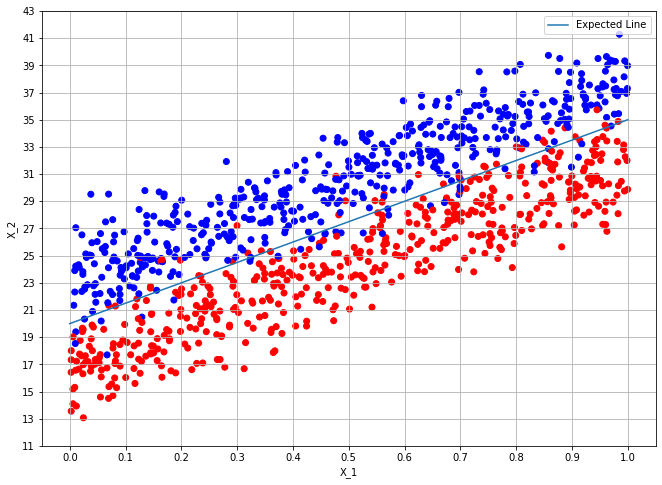

In [253]:
# DO NOT CHANGE THESE VARIABLE NAMES!
# THEY ARE USED IN OTHER PLACES!
w = 15
b = 20
mu = 3
sigma = 2
m = 1000
X, y = get_random_data(w, b, mu, sigma, m)
display_random_data(X, y)

## Split data (80:20) Test and Training Data

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Problem 2

## Additional Imports

In [0]:
%tensorflow_version 2.x
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import math

## Build Model

In [0]:
model = Sequential()
model.add(Dense(1, activation='sigmoid', input_shape=(2,)))

## Compile Model

In [257]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


## Train model

In [258]:
history = model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test))

Epoch 1/300
25/25 [==============================] - 0s 5ms/step - loss: 8.1918 - accuracy: 0.5150 - val_loss: 9.2029 - val_accuracy: 0.4550
Epoch 2/300
25/25 [==============================] - 0s 3ms/step - loss: 7.8164 - accuracy: 0.5150 - val_loss: 8.7644 - val_accuracy: 0.4550
Epoch 3/300
25/25 [==============================] - 0s 3ms/step - loss: 7.4344 - accuracy: 0.5150 - val_loss: 8.3336 - val_accuracy: 0.4550
Epoch 4/300
25/25 [==============================] - 0s 3ms/step - loss: 7.0574 - accuracy: 0.5150 - val_loss: 7.8954 - val_accuracy: 0.4550
Epoch 5/300
25/25 [==============================] - 0s 3ms/step - loss: 6.6789 - accuracy: 0.5150 - val_loss: 7.4590 - val_accuracy: 0.4550
Epoch 6/300
25/25 [==============================] - 0s 2ms/step - loss: 6.2976 - accuracy: 0.5150 - val_loss: 7.0272 - val_accuracy: 0.4550
Epoch 7/300
25/25 [==============================] - 0s 3ms/step - loss: 5.9210 - accuracy: 0.5150 - val_loss: 6.5875 - val_accuracy: 0.4550
Epoch 8/300
2

## Plot Accuracy of model

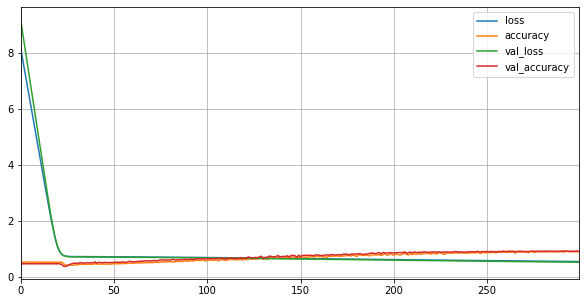

In [259]:
pd.DataFrame(history.history).plot(figsize=(10, 5))
plt.grid(True)

## Predicted Line / Checking weights

Here we are extracting the 2 weights and bias from the trained model:

A = Weight 1

B = Weight 2

C = Bias

In [0]:
A = model.layers[0].get_weights()[0][0][0]
B = model.layers[0].get_weights()[0][1][0]
C = model.layers[0].get_weights()[1][0]

The sigmoid activation function is:
\begin{equation*}
\sigma \:\left(z\right)=\frac{1}{1+e^z}
\end{equation*}


In [0]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

This c(x,y) represents the equation:
\begin{equation*}
c\left(x,y\right)=\sigma\:\left(Ax+By+C\right)
\end{equation*}


In [0]:
def c(x, y):
  return sigmoid(A*x+B*y+C)

We know the decision line is located at C(x,y)=1/2
Therefore we can generate the equation:

\begin{equation*}
\frac{1}{2}=\frac{1}{1+e^{Ax+By+C}}
\end{equation*}

We also know our X falls between x=0 and x=1. Therefore we can determine what your y coordinate would be between these two points. So we solve for y:

\begin{equation*}
y=-\frac{Ax+C}{B}
\end{equation*}

In [0]:
def y_coordinate(x):
  # This equation was found by solving the equation 1/2)
  return -(A*x+C)/B

Here we generate the predicted line using the y_coordinate function at x=0 and x=1 and drawing a line between these 2 points:
\begin{equation*}
\end{equation*}
\begin{equation*}
f\left(0\right)=-\frac{A(0)+C}{B}
\end{equation*}
\begin{equation*}
\end{equation*}
\begin{equation*}
f\left(1\right)=-\frac{A(1)+C}{B}
\end{equation*}

In [0]:
predicted_line = [[0,1],[y_coordinate(0),y_coordinate(1)]]

Expected Scatter Results

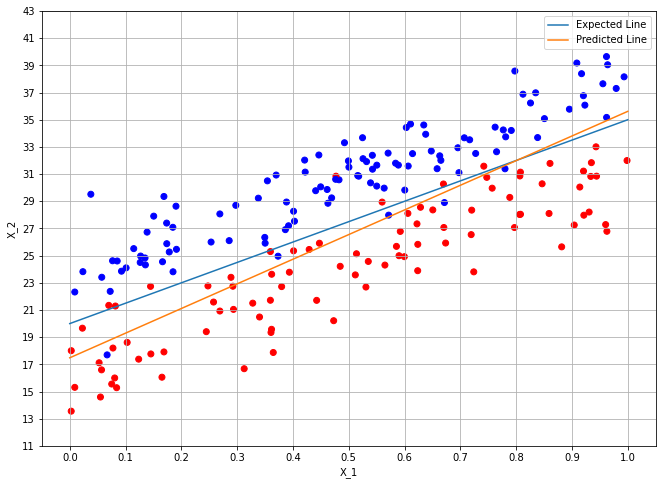

In [265]:
display_random_data(X_test, y_test, predicted_line)

Predicted Scatter Results

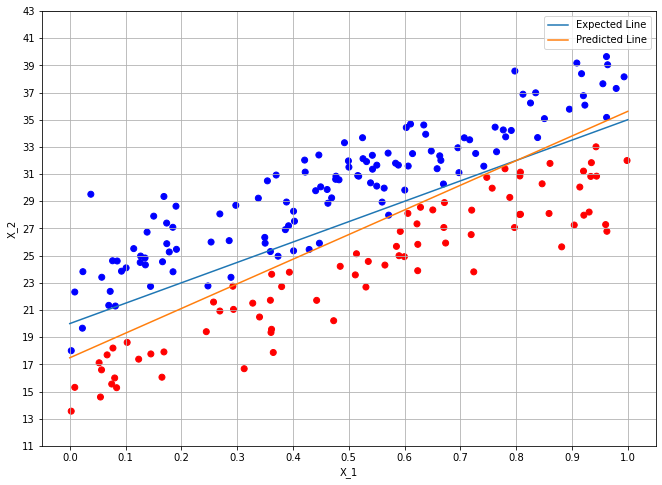

In [266]:
display_random_data(X_test, np.round(model.predict(X_test)), predicted_line)

## Heatmap


Generate Data for heatmap

Here we are using mu, sigma, and b to determine the range of values on our data generation for the heatmap

Remember what our mu, sigma and b are below

In [267]:
print(f'mu = {mu}')
print(f'sigma = {sigma}')
print(f'b = {b}')

mu = 3
sigma = 2
b = 20


In [0]:
def display_heatmap():
  # Returns a (2,1) array
  # X_1 ticks are 0.1
  X_1 = np.arange(0, 1.01, 0.01)
  # X_2 range is determined within 3 standard deviations from the mean after mu is applied
  num_std_dev = 3
  lower_y = get_boundaries(0, num_std_dev)[0]
  upper_y = get_boundaries(1, num_std_dev)[1]
  tick_spacing = (upper_y-lower_y) / 101
  X_2 = np.arange(lower_y, upper_y, tick_spacing)

  rows, cols = (101, 101)
  heatmap = []
  for i, y in enumerate(X_2):
    heatmap.append([])
    for j, x in enumerate(X_1):
      heatmap[i].append(c(x,y))

  plt.figure(figsize=[12,12])
  plt.xlabel('X_1')
  plt.ylabel('X_2')
  plt.xticks(ticks=np.arange(0, 101, 10), labels=np.round(np.arange(0, 1.1, 0.1), 1))
  plt.yticks(ticks=np.arange(0, 101, math.floor(101/(upper_y-lower_y))), labels=np.arange(round(lower_y), round(lower_y)+100, 1))
  plt.imshow(heatmap, cmap='seismic', origin='lower')
  plt.colorbar()
  plt.show()

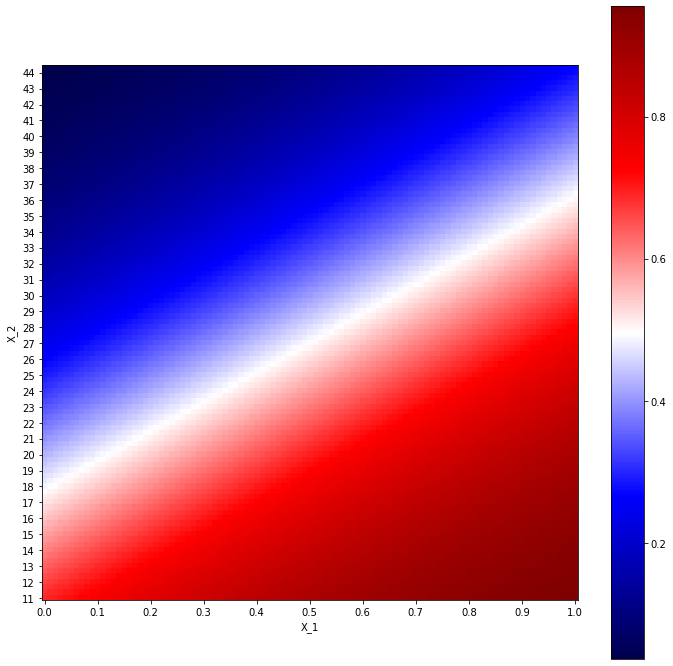

In [269]:
display_heatmap()

# Problem 3

## New Import Needed for Creating Custom Legend in pyplot

In [0]:
from matplotlib.lines import Line2D

## Defining Variables

In [0]:
learning_rate = 0.01
epochs = 9000

# DO NOT CHANGE THESE VARIABLE NAMES!
# THEY ARE USED IN OTHER PLACES!
# I dropped these off here just in case I want to modify my data to test the custom model
w = w
b = b
mu = mu
sigma = sigma
m = m

## Defining fitting function

In [0]:
def fit(X, y, learning_rate=0.01, epochs=10000):
  # X now has a column of 1's in the first column
  X = add_padding(X)
  
  # weights initialization
  theta = np.zeros(X.shape[1])
  for i in range(epochs):
    z = np.dot(X, theta)
    a = sigmoid(z)
    gradient = np.dot(X.T, (a - y)) / y.size
    theta -= learning_rate * gradient
    
    z = np.dot(X, theta)
    a = sigmoid(z)
    loss = binary_crossentropy_loss(y, a)
  return theta

## Predict Probability Function

In [0]:
def predict(X, theta):
    X = add_padding(X)
    return sigmoid(np.dot(X, theta))

## Add padding function for intercept

In [0]:
def add_padding(X):
    padding = np.ones((X.shape[0], 1))
    return np.concatenate((padding, X), axis=1)

## Binary Cross Entropy Function

Grabbed from: https://github.com/schneider128k/machine_learning_course/blob/master/slides/logistic_regression.pdf

\begin{equation*}
\mathcal{L} _{ce}=-y\log \left(a\right)-\left(1-y\right)\log \left(1-a\right)
\end{equation*}

In [0]:
def binary_crossentropy_loss(y, a):
    return (-y)*np.log(a)-(1-y)*np.log(1-a)

## Train Model

In [0]:
# Here we get a fresh set of data to ensure our Custom model is working.
# It wouldn't be believable if I used old data, right?
X, y = get_random_data(w, b, mu, sigma, m)

# theta here stores out weights. Shoulda be np array with shape (3,) representing our 2 weights and bias :)
theta = fit(X, y, learning_rate=learning_rate, epochs=epochs)

## Display Predicted Data Function

In [0]:
def display_data_custom(X, y):
  red_blue = []
  for label in y:
    red_blue.append('red' if (label==1) else 'blue')

  # Lowest X and Highest X terms
  X_min = 0
  X_max = 1

  # Designing Figure Layout & Legend
  plt.figure(figsize=[11,8])
  plt.xlabel('X_1')
  plt.ylabel('X_2')
  plt.grid(True)
  custom_lines = [Line2D([0], [0], color='green', lw=4), 
                  Line2D([0], [0], color='black', lw=4)]
  plt.legend(custom_lines, ['Expected Line', 'Predicted Line'])
  # X ticks are 0.1
  plt.xticks(np.arange(0, 1.1, 0.1))
  # Y range is determined within 3 standard deviations from the mean after mu is applied
  num_std_dev = 3
  lower_y = get_boundaries(X_min, num_std_dev)[X_min]
  upper_y = get_boundaries(X_max, num_std_dev)[X_max]
  tick_spacing = round((upper_y-lower_y) / 20)
  plt.yticks(np.arange(lower_y, upper_y, tick_spacing))

  # Displaying Scatterplot data
  plt.scatter(X[:,0],X[:,1], c=red_blue)

  # Displaying Actual Line
  x = np.array(range(0, 2))  
  y = linear_equation(x)
  plt.plot(x, y, c="green") # Expected Line

  # Displaying Predicted line form model
  # CODE SOURCE BELOW FROM: https://github.com/learn-co-students/ds-support-vector-machines-lab-data-science
  x1_coord = np.linspace(X_min, X_max)
  x2_coord = np.linspace(lower_y, upper_y)

  X2_C, X1_C = np.meshgrid(x1_coord, x2_coord)
  x1x2 = np.c_[X2_C.ravel(), X1_C.ravel()]
  Z = predict(x1x2, theta).reshape(X1_C.shape)
  plt.contour(X2_C, X1_C, Z, [1/2], c="black");
  plt.show()
  plt.figure(figsize=[12,12])
  plt.imshow(Z, cmap='seismic', origin='lower')
  plt.colorbar()
  plt.show()

## Displaying Data from custom Model

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: The following kwargs were not used by contour: 'c'


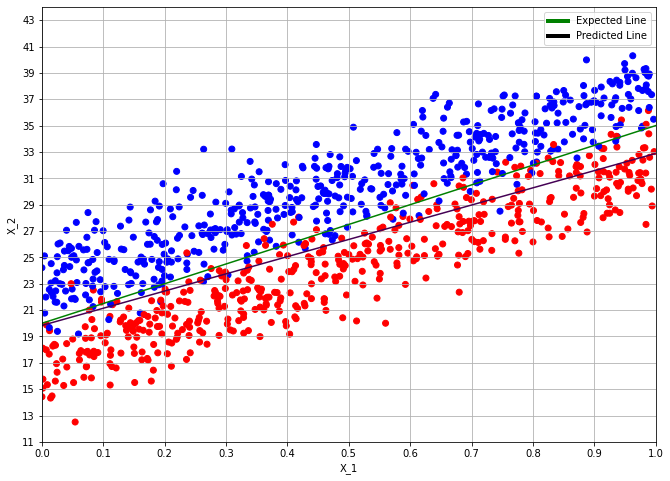

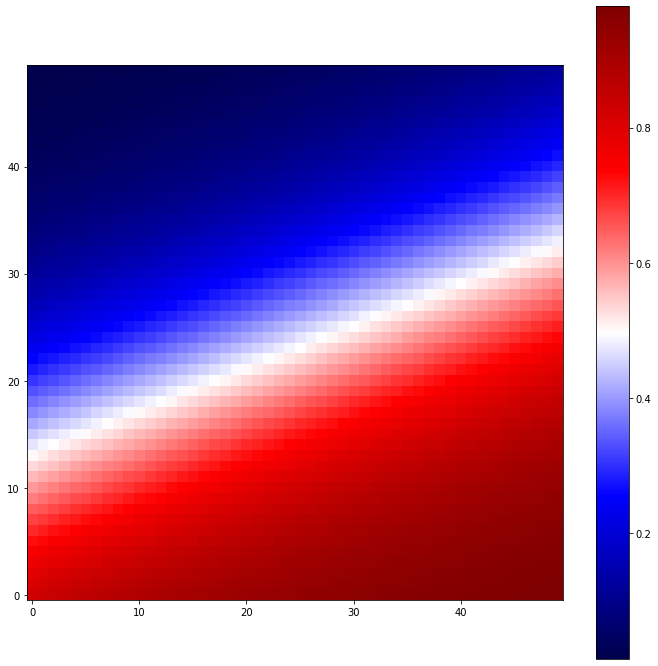

In [278]:
display_data_custom(X, y)